# Eksplorasi Data

Pada notebook ini akan dilakukan eksplorasi data yang digunakan untuk mengembangkan Sistem Rekomendasi Keputusan Dagang. Data yang digunakan untuk membuat sistem ini adalah data harga saham 2022-Mei 2024 serta data laporan keuangan 2022-2023. Sebelum mengembangkan sistem tersebut, perlu dilakukan eksplorasi terhadap data yang digunakan. Hal ini bertujuan untuk mengetahui sifat dari data yang ada setelah penyiapan dilakukan.

Melakukan instalasi pustaka yang belum tersedia

In [2]:
!pip install plotly==5.22.0
!pip install --upgrade nbformat
!pip install calplot


[notice] A new release of pip is available: 23.1.2 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Melakukan import pustaka yang diperlukan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly.graph_objects as go
import statistics
import numpy as np
import calplot

Daftar Method yang Digunakan

In [4]:
def data_clean(path_data):
  df = pd.read_csv(path_data)
  df = df.drop('Unnamed: 0', axis=1)
  df = df.sort_values('date', ascending=True)
  df = df.drop_duplicates()
  df['date'] = pd.to_datetime(df['date'])
  df.set_index('date', inplace=True)
  return df

## Harga Saham

Pada bagian ini akan dilakukan eksplorasi terhadap data harga saham yang digunakan. 

Melihat file-file harga saham yang tersimpan

In [5]:
dir_harga_saham = "data_plus_mei"
list_df_harga_saham = os.listdir(dir_harga_saham)
list_df_harga_saham

['ACES2201-2405.csv',
 'AMRT2201-2405.csv',
 'ASII2201-2405.csv',
 'HRUM2201-2405.csv',
 'INKP2201-2405.csv',
 'INTP2201-2405.csv',
 'MAPI2201-2405.csv',
 'SIDO2201-2405.csv',
 'UNTR2201-2405.csv',
 'UNVR2201-2405.csv']

In [6]:
df_amrt = data_clean(dir_harga_saham+"/"+list_df_harga_saham[1])
df_asii = data_clean(dir_harga_saham+"/"+list_df_harga_saham[2])
df_hrum = data_clean(dir_harga_saham+"/"+list_df_harga_saham[3])
df_inkp = data_clean(dir_harga_saham+"/"+list_df_harga_saham[4])
df_intp = data_clean(dir_harga_saham+"/"+list_df_harga_saham[5])
df_mapi = data_clean(dir_harga_saham+"/"+list_df_harga_saham[6])
df_sido = data_clean(dir_harga_saham+"/"+list_df_harga_saham[7])
df_untr = data_clean(dir_harga_saham+"/"+list_df_harga_saham[8])
df_unvr = data_clean(dir_harga_saham+"/"+list_df_harga_saham[9])

Mengambil salah satu sampel emiten sebagai bahan eksplorasi data harga saham secara umum. Eksplorasi awal menggunakan data saham ACES

In [7]:
df_aces = data_clean(dir_harga_saham+"/"+list_df_harga_saham[0])
df_aces.head()

,stock_code,prev,open,high,low,close,change
date,,,,,,,
2022-01-03,ACES,1280,1285,1385,1285,1380,100
2022-01-04,ACES,1380,1380,1380,1345,1365,-15
2022-01-05,ACES,1365,1365,1395,1350,1385,20
2022-01-06,ACES,1385,1380,1385,1335,1360,-25
2022-01-07,ACES,1360,1370,1390,1350,1380,20


### Melihat Persebaran Data Berdasarkan Tanggal

Membuat list dan memisahkan per tahun

In [8]:
#mengambil data tahun saja
date_list = df_aces.index
#membuat list pertahun
date_2022 = []
date_2023 = []
date_2024 = []
for value in date_list:
    if value.year == 2022:
        date_2022.append(value)
    elif value.year == 2023:
        date_2023.append(value)
    elif value.year == 2024:
        date_2024.append(value)


Melihat jumlah per tahun

In [9]:
len_2022 = len(date_2022)
len_2023 = len(date_2023)
len_2024 = len(date_2024)
print(len_2022, len_2023, len_2024)

246 239 92


Melakukan visualisasi dengan barchart

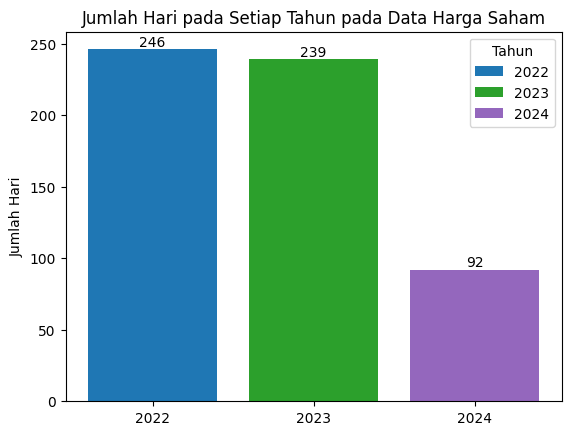

In [10]:

fig, ax = plt.subplots()

fruits = [str(2022), str(2023), str(2024)]
counts = [len_2022, len_2023, len_2024]
bar_colors = ['tab:blue', 'tab:green', 'tab:purple']

bar_container = ax.bar(fruits, counts, label=fruits, color=bar_colors)

ax.set_ylabel('Jumlah Hari')
ax.set_title('Jumlah Hari pada Setiap Tahun pada Data Harga Saham')
ax.bar_label(bar_container)
ax.legend(title='Tahun')

plt.show()

#### Jumlah Hari pada Setiap Tahun
Berdasarkan gambar dapat terlihat bahwa jumlah hari kerja bursa adalah sebagai berikut:
- Tahun 2022 sebanyak 246 hari
- Tahun 2023 sebanyak 239 hari
- Tahun 2024 sebanyak 93 hari (Sampai Mei 2024)

Melihat persebaran hari per bulan berdasarkan tahun

2022

In [11]:
date_2022
jan = []
feb = []
mar = []
apr = []
mei = []
jun = []
jul = []
ags = []
sep = []
okt = []
nov = []
des = []
for value in date_2022:
    if value.month == 1:
        jan.append(value)
    elif value.month == 2:
        feb.append(value)
    elif value.month == 3:
        mar.append(value)
    elif value.month == 4:
        apr.append(value)
    elif value.month == 5:
        mei.append(value)
    elif value.month == 6:
        jun.append(value)
    elif value.month == 7:
        jul.append(value)
    elif value.month == 8:
        ags.append(value)
    elif value.month == 9:
        sep.append(value)
    elif value.month == 10:
        okt.append(value)
    elif value.month == 11:
        nov.append(value)
    elif value.month == 12:
        des.append(value)



In [12]:
len_2022_01 = len(jan)
len_2022_02 = len(feb)
len_2022_03 = len(mar)
len_2022_04 = len(apr)
len_2022_05 = len(mei)
len_2022_06 = len(jun)
len_2022_07 = len(jul)
len_2022_08 = len(ags)
len_2022_09 = len(sep)
len_2022_10 = len(okt)
len_2022_11 = len(nov)
len_2022_12 = len(des)

arr_month_2022 = [len_2022_01, len_2022_02, len_2022_03, len_2022_04, len_2022_05, len_2022_06,
      len_2022_07, len_2022_08, len_2022_09, len_2022_10, len_2022_11, len_2022_12]
print(arr_month_2022)
print("max:", max(arr_month_2022))
print("min:", min(arr_month_2022))
print("median:", statistics.median(arr_month_2022))
print("mean:", statistics.mean(arr_month_2022))

[21, 18, 22, 19, 15, 21, 21, 22, 22, 21, 22, 22]
max: 22
min: 15
median: 21.0
mean: 20.5


<function matplotlib.pyplot.show(close=None, block=None)>

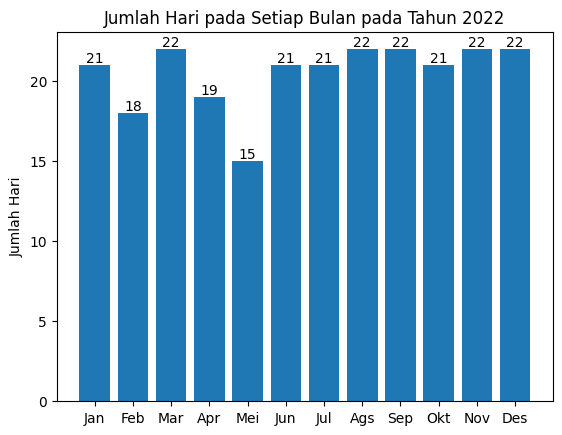

In [13]:
fig, ax = plt.subplots()

fruits = ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Ags", "Sep", "Okt", "Nov", "Des"]
counts = [len_2022_01, len_2022_02, len_2022_03, len_2022_04, len_2022_05, len_2022_06,
          len_2022_07, len_2022_08, len_2022_09, len_2022_10, len_2022_11, len_2022_12]


bar_container = ax.bar(fruits, counts, label=fruits)

ax.set_ylabel('Jumlah Hari')
ax.set_title('Jumlah Hari pada Setiap Bulan pada Tahun 2022')
ax.bar_label(bar_container)
#ax.legend(title='Bulan')

plt.show


#### Jumlah Hari pada Setiap Bulan pada Tahun 2022
Berdasarkan gambar dapat terlihat bahwa jumlah hari kerja bursa pada tahun 2022 adalah sebagai berikut:
1. Januari = 21 hari
2. Februari = 18 hari
3. Maret = 22 hari
4. April = 19 hari
5. Mei = 15 hari
6. Juni = 21 hari
7. Juli = 21 hari
8. Agustus = 22 hari
9. September = 22 hari
10. Oktober = 21 hari
11. November = 22 hari
12. Desember = 22 hari

Dengan nilai maksimal sebesar 22 hari, dan nilai minimal sebesar 15 hari. Nilai minimal terjadi pada bulan Mei

In [14]:
date_2023
jan = []
feb = []
mar = []
apr = []
mei = []
jun = []
jul = []
ags = []
sep = []
okt = []
nov = []
des = []
for value in date_2023:
    if value.month == 1:
        jan.append(value)
    elif value.month == 2:
        feb.append(value)
    elif value.month == 3:
        mar.append(value)
    elif value.month == 4:
        apr.append(value)
    elif value.month == 5:
        mei.append(value)
    elif value.month == 6:
        jun.append(value)
    elif value.month == 7:
        jul.append(value)
    elif value.month == 8:
        ags.append(value)
    elif value.month == 9:
        sep.append(value)
    elif value.month == 10:
        okt.append(value)
    elif value.month == 11:
        nov.append(value)
    elif value.month == 12:
        des.append(value)


len_2023_01 = len(jan)
len_2023_02 = len(feb)
len_2023_03 = len(mar)
len_2023_04 = len(apr)
len_2023_05 = len(mei)
len_2023_06 = len(jun)
len_2023_07 = len(jul)
len_2023_08 = len(ags)
len_2023_09 = len(sep)
len_2023_10 = len(okt)
len_2023_11 = len(nov)
len_2023_12 = len(des)

arr_month_2023 = [len_2023_01, len_2023_02, len_2023_03, len_2023_04, len_2023_05, len_2023_06,
      len_2023_07, len_2023_08, len_2023_09, len_2023_10, len_2023_11, len_2023_12]
print(arr_month_2023)
print("max:", max(arr_month_2023))
print("min:", min(arr_month_2023))
print("median:", statistics.median(arr_month_2023))
print("mean:", statistics.mean(arr_month_2023))


[21, 20, 21, 14, 21, 17, 20, 22, 20, 22, 22, 19]
max: 22
min: 14
median: 20.5
mean: 19.916666666666668


<function matplotlib.pyplot.show(close=None, block=None)>

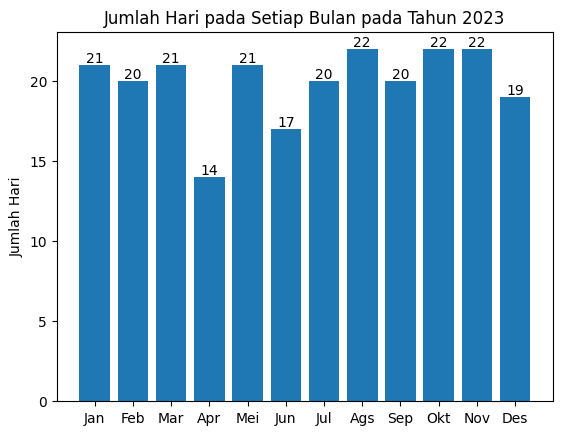

In [15]:
fig, ax = plt.subplots()

fruits = ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Ags", "Sep", "Okt", "Nov", "Des"]
counts = [len_2023_01, len_2023_02, len_2023_03, len_2023_04, len_2023_05, len_2023_06,
          len_2023_07, len_2023_08, len_2023_09, len_2023_10, len_2023_11, len_2023_12]


bar_container = ax.bar(fruits, counts, label=fruits)

ax.set_ylabel('Jumlah Hari')
ax.set_title('Jumlah Hari pada Setiap Bulan pada Tahun 2023')
ax.bar_label(bar_container)
#ax.legend(title='Bulan')

plt.show


#### Jumlah Hari pada Setiap Bulan pada Tahun 2023
Berdasarkan gambar dapat terlihat bahwa jumlah hari kerja bursa pada tahun 2023 adalah sebagai berikut:
1. Januari = 21 hari
2. Februari = 20 hari
3. Maret = 21 hari
4. April = 14 hari
5. Mei = 21 hari
6. Juni = 17 hari
7. Juli = 20 hari
8. Agustus = 22 hari
9. September = 20 hari
10. Oktober = 22 hari
11. November = 22 hari
12. Desember = 19 hari

Dengan nilai maksimal sebesar 22 hari, dan nilai minimal sebesar 14 hari. Nilai minimal terjadi pada bulan April

In [16]:
date_2024
jan = []
feb = []
mar = []
apr = []
mei = []
for value in date_2024:
    if value.month == 1:
        jan.append(value)
    elif value.month == 2:
        feb.append(value)
    elif value.month == 3:
        mar.append(value)
    elif value.month == 4:
        apr.append(value)
    elif value.month == 5:
        mei.append(value)

len_2024_01 = len(jan)
len_2024_02 = len(feb)
len_2024_03 = len(mar)
len_2024_04 = len(apr)
len_2024_05 = len(mei)


arr_month_2024 = [len_2024_01, len_2024_02, len_2024_03, len_2024_04, len_2024_05]
print(arr_month_2024)
print("max:", max(arr_month_2024))
print("min:", min(arr_month_2024))
print("median:", statistics.median(arr_month_2024))
print("mean:", statistics.mean(arr_month_2024))


[22, 18, 18, 16, 18]
max: 22
min: 16
median: 18
mean: 18.4


<function matplotlib.pyplot.show(close=None, block=None)>

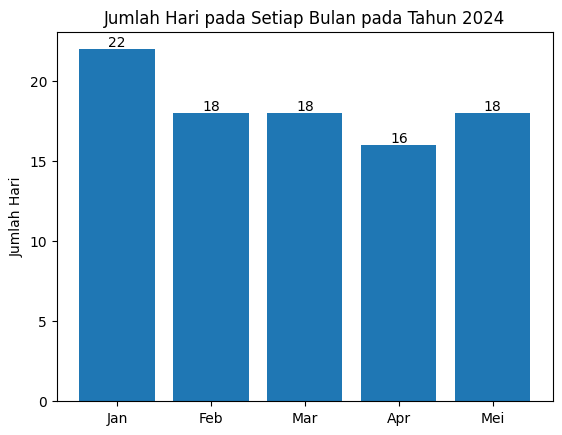

In [17]:
fig, ax = plt.subplots()

fruits = ["Jan", "Feb", "Mar", "Apr", "Mei"]
counts = [len_2024_01, len_2024_02, len_2024_03, len_2024_04, len_2024_05]


bar_container = ax.bar(fruits, counts, label=fruits)

ax.set_ylabel('Jumlah Hari')
ax.set_title('Jumlah Hari pada Setiap Bulan pada Tahun 2024')
ax.bar_label(bar_container)
#ax.legend(title='Bulan')

plt.show


#### Jumlah Hari pada Setiap Bulan pada Tahun 2024
Berdasarkan gambar dapat terlihat bahwa jumlah hari kerja bursa pada tahun 2024 adalah sebagai berikut:
1. Januari = 22 hari
2. Februari = 18 hari
3. Maret = 18 hari
4. April = 16 hari
5. Mei = 18 hari
Dengan nilai maksimal sebesar 22 hari, dan nilai minimal sebesar 16 hari. Nilai minimal terjadi pada bulan April

In [18]:
# Pandas time series with random data for each day
values = pd.Series(([1]*len(df_aces)), index = df_aces.index)

In [19]:
values[490:]

date
2024-01-09    1
2024-01-10    1
2024-01-11    1
2024-01-12    1
2024-01-15    1
             ..
2024-05-27    1
2024-05-28    1
2024-05-29    1
2024-05-30    1
2024-05-31    1
Length: 87, dtype: int64

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1000x510 with 3 Axes>,
 array([<Axes: ylabel='2024'>, <Axes: ylabel='2023'>,
        <Axes: ylabel='2022'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


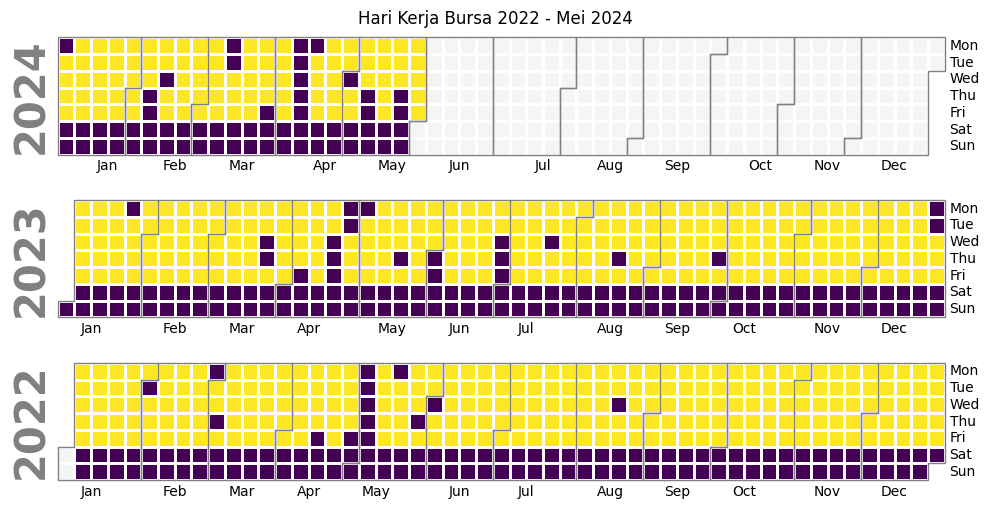

In [20]:
import calplot
import matplotlib.pyplot as plt

calplot.calplot(values, yearascending = False,
                suptitle = 'Hari Kerja Bursa 2022 - Mei 2024', 
                suptitle_kws = {'x': 0.5, 'y': 1.0})
# plt.show()

#### Visualisasi Hari Kerja Bursa Tahun 2022 - Mei 2024
Pada gambar ini merupakan persebaran hari kerja bursa dan hari liburnya. Kotak yang berwarna kuning melambangkan hari libur. Sedangkan kotak berwarna hijau menunjukkan hari libur.

### Melihat Plot Harga Saham Emiten

Text(0.5, 1.0, 'Riwayat Harga Penutupan pada Semua Emiten ')

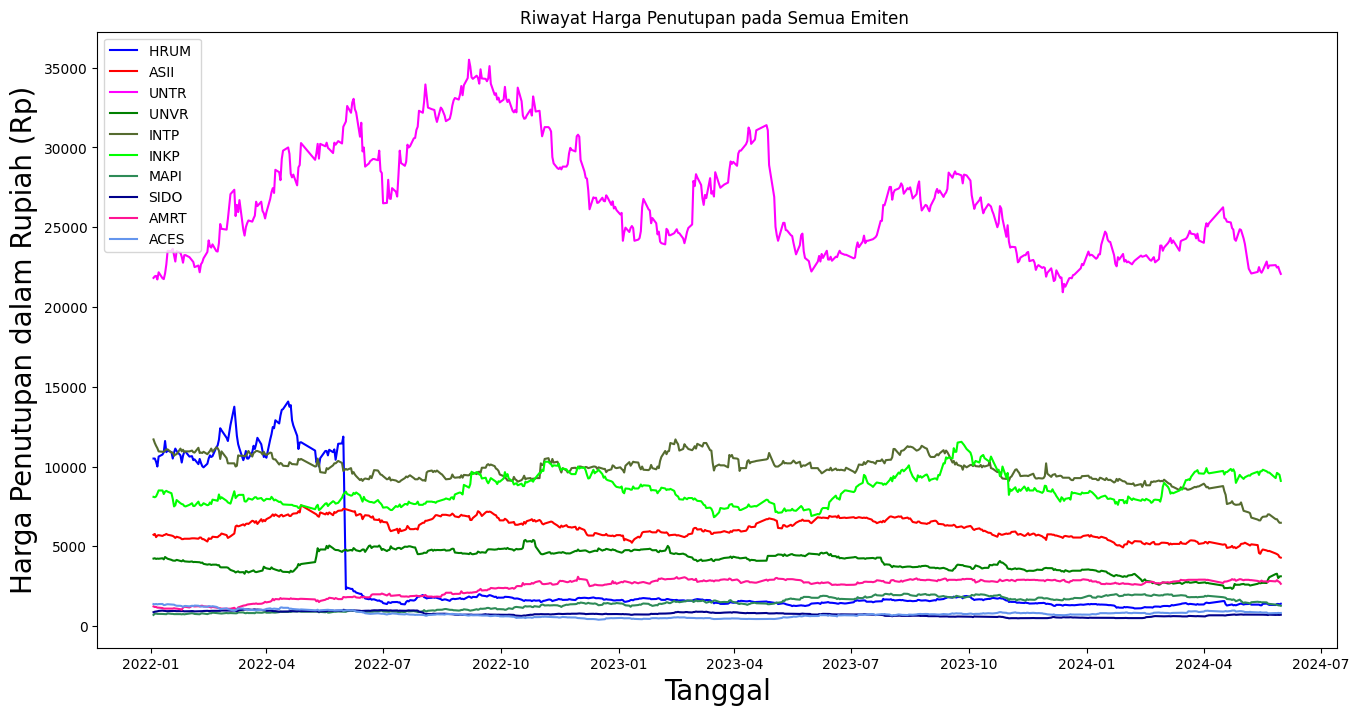

In [21]:
plt.figure(figsize=(16,8))
plt.plot(df_hrum['close'], color='blue', label='HRUM ')
plt.plot(df_asii['close'], color='red', label='ASII')
plt.plot(df_untr['close'], color='fuchsia', label='UNTR')
plt.plot(df_unvr['close'], color='green', label='UNVR ')
plt.plot(df_intp['close'], color='darkolivegreen', label='INTP')
plt.plot(df_inkp['close'], color='lime', label='INKP')
plt.plot(df_mapi['close'], color='seagreen', label='MAPI')
plt.plot(df_sido['close'], color='darkblue', label='SIDO')
plt.plot(df_amrt['close'], color='deeppink', label='AMRT')
plt.plot(df_aces['close'], color='cornflowerblue', label='ACES')
plt.xlabel('Tanggal', fontsize=20)
plt.ylabel('Harga Penutupan dalam Rupiah (Rp)', fontsize=20)
plt.legend()
plt.title('Riwayat Harga Penutupan pada Semua Emiten ')

#### Plot Seluruh Harga Penutupan Seluruh Emiten
Pada gambar terlihat harga seluruh emiten. Pada grafik dibedakan juga antara emiten dengan ranking atas, menengah dan bawah. 
- Emiten dengan ranking atas memiliki warna merah dan turunannya (ASII, AMRT, UNTR)
- Emiten dengan ranking menengah memiliki warna hijau dan turunannya (UNVR, MAPI, INKP, INTP)
- Emiten dengan ranking bawah memiliki warna biru dan turunanya (ACES, SIDO, HRUM)
Dari gambar dapat disimpulkan
- Emiten dengan ranking atas cenderung memiliki harga diatas emiten dengan ranking bawah. Tetapi bila dibandingkan dengan emiten ranking menengah masih ada emiten dengan harga yang lebih tinggi. Meskipun begitu, emiten dengan harga termahal adalah UNTR yang memiliki harga jauh lebih tinggi dibandingkan emiten lainnya.
- Emiten dengan ranking menengah memiliki harga yang cenderung diatas emiten dengan ranking bawah. Beberapa diantaranya bahkan diatas emiten dengan ranking atas.
- Emiten dengan  ranking bawah cenderung memiliki harga yang lebih murah dibandingkan emiten ranking atas dan menengah. Terlihat juga terdapat salah satu emiten yang awalnya memiliki harga tinggi (HRUM) menjadi turun. Setelah diselidiki hal ini karena saham HRUM mengalami stock split 1:5 pada 2 Juni 2022 sehingga harganya menjadi turun secara signifikan  

#### Visualisasi Data per Emiten

##### ACES

In [33]:
df_aces.describe()

,prev,open,high,low,close,change
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,759.521664,433.500867,775.625650,745.438475,758.724437,-0.797227
std,221.033958,403.898623,223.237111,216.765835,219.980488,21.552877
min,398.000000,0.000000,420.000000,392.000000,398.000000,-70.000000
25%,585.000000,0.000000,600.000000,565.000000,585.000000,-10.000000
50%,740.000000,500.000000,760.000000,730.000000,740.000000,0.000000
75%,850.000000,780.000000,865.000000,830.000000,850.000000,10.000000
max,1385.000000,1385.000000,1395.000000,1365.000000,1385.000000,100.000000


In [22]:
fig = go.Figure(data=[go.Candlestick(x=df_aces['prev'].index,
                open=df_aces['open'],
                high=df_aces['high'],
                low=df_aces['low'],
                close=df_aces['close'])])

fig.show()

Text(0.5, 1.0, 'Riwayat Harga Penutupan pada Emiten ACES')

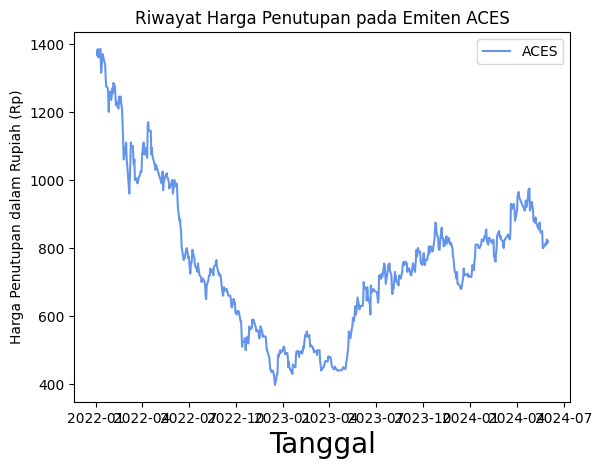

In [57]:
plt.plot(df_aces['close'], color='cornflowerblue', label='ACES')
plt.xlabel('Tanggal', fontsize=20)
plt.ylabel('Harga Penutupan dalam Rupiah (Rp)', fontsize=10)
plt.legend()
plt.title('Riwayat Harga Penutupan pada Emiten ACES')

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1250x510 with 4 Axes>,
 array([<Axes: ylabel='2024'>, <Axes: ylabel='2023'>,
        <Axes: ylabel='2022'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


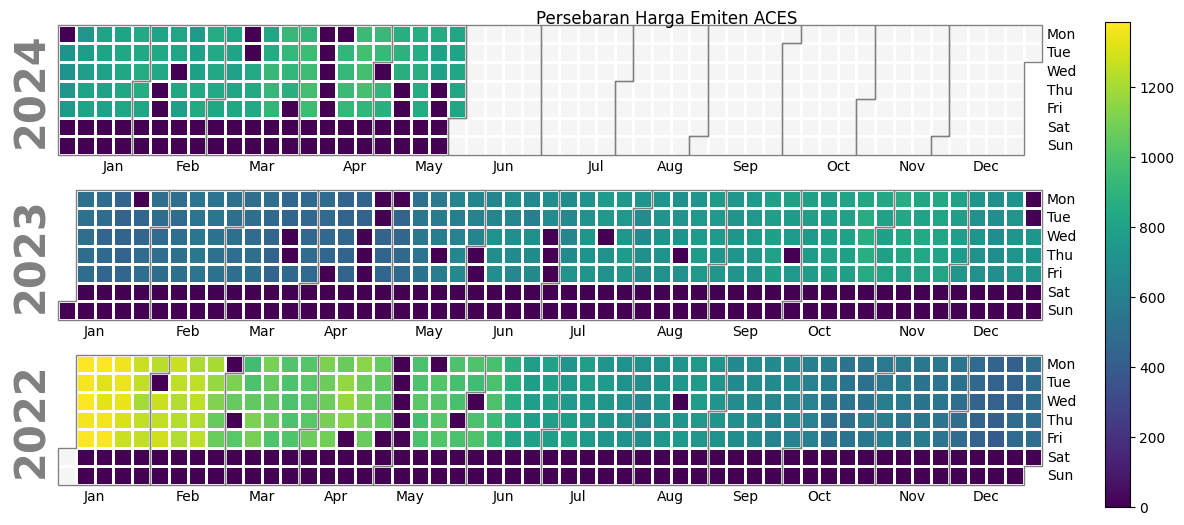

In [58]:
import calplot
import matplotlib.pyplot as plt

calplot.calplot(df_aces['close'], yearascending = False,
                suptitle = 'Persebaran Harga Emiten ACES', 
                suptitle_kws = {'x': 0.5, 'y': 1.0})
# plt.show()

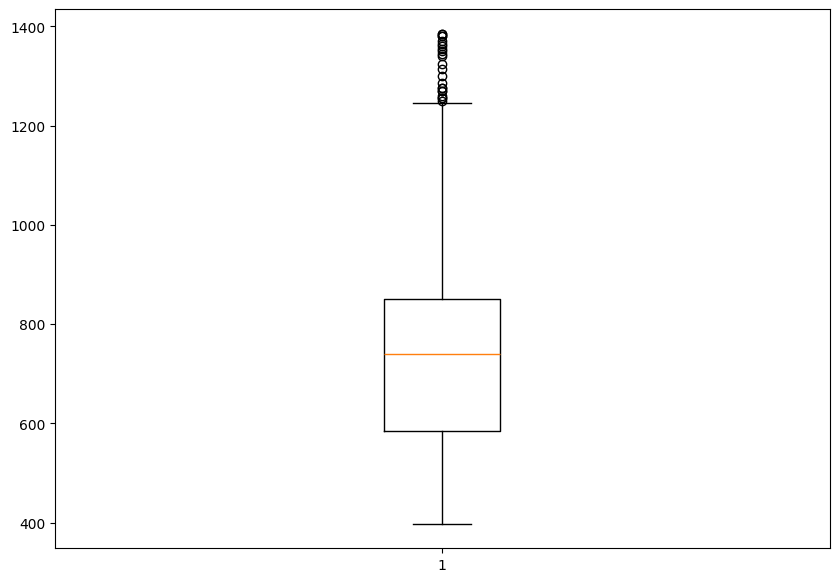

In [25]:
fig = plt.figure(figsize =(10, 7)) 
# Creating plot
plt.boxplot(df_aces['close'])
# show plot
plt.show()

<Axes: >

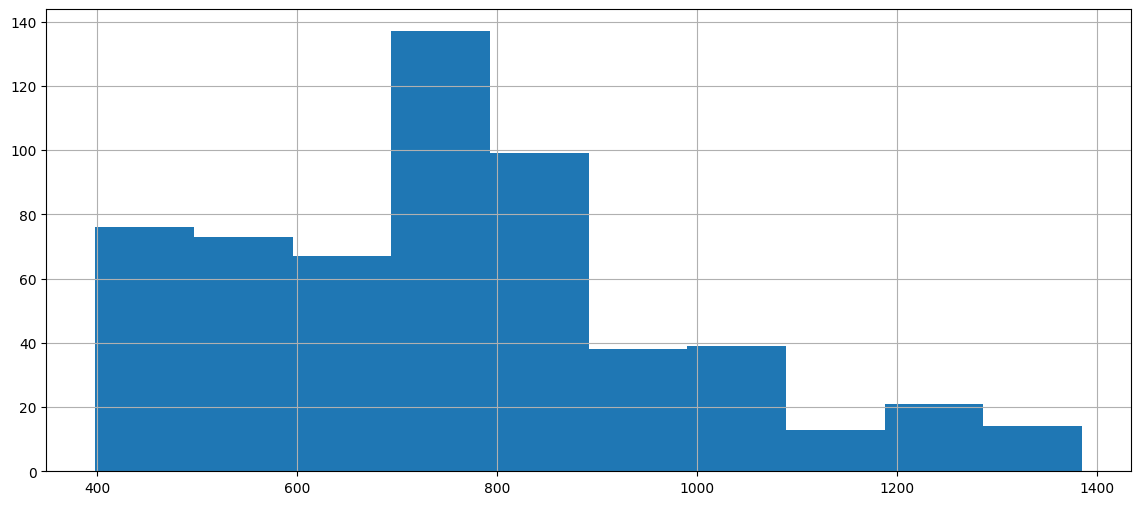

In [26]:
df_aces['close'].hist(bins=10, figsize=[14,6])

##### ASII

In [37]:
df_asii.describe()

,prev,open,high,low,close,change
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,6096.325823,6100.918544,6166.568458,6026.273830,6093.882149,-2.443674
std,638.618383,631.999848,644.766600,627.613617,642.821410,103.399294
min,4320.000000,4340.000000,4370.000000,4290.000000,4290.000000,-525.000000
25%,5625.000000,5650.000000,5700.000000,5575.000000,5625.000000,-50.000000
50%,6075.000000,6100.000000,6150.000000,6050.000000,6075.000000,0.000000
75%,6650.000000,6650.000000,6700.000000,6550.000000,6650.000000,50.000000
max,7575.000000,7425.000000,7700.000000,7300.000000,7575.000000,450.000000


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


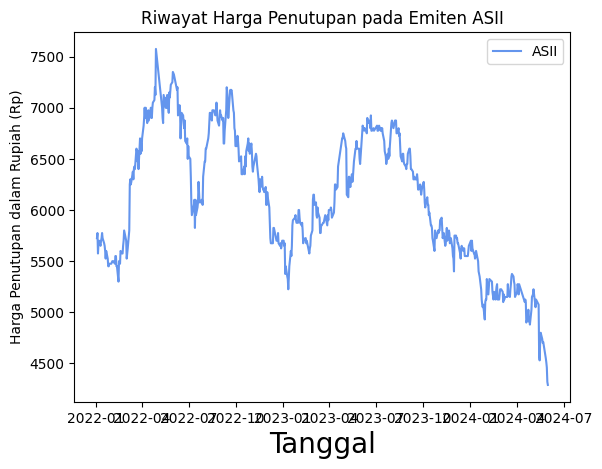

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


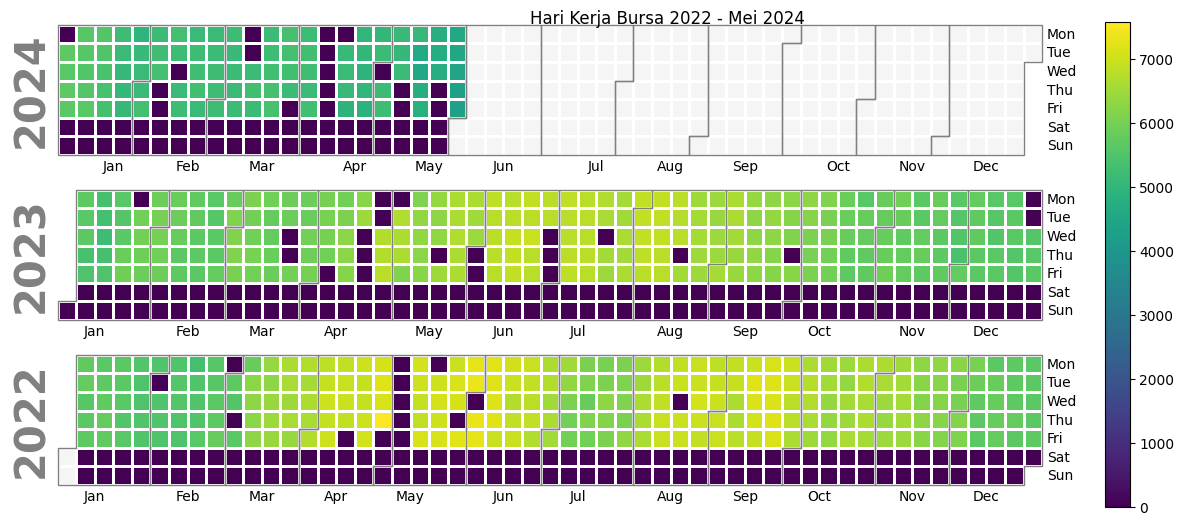

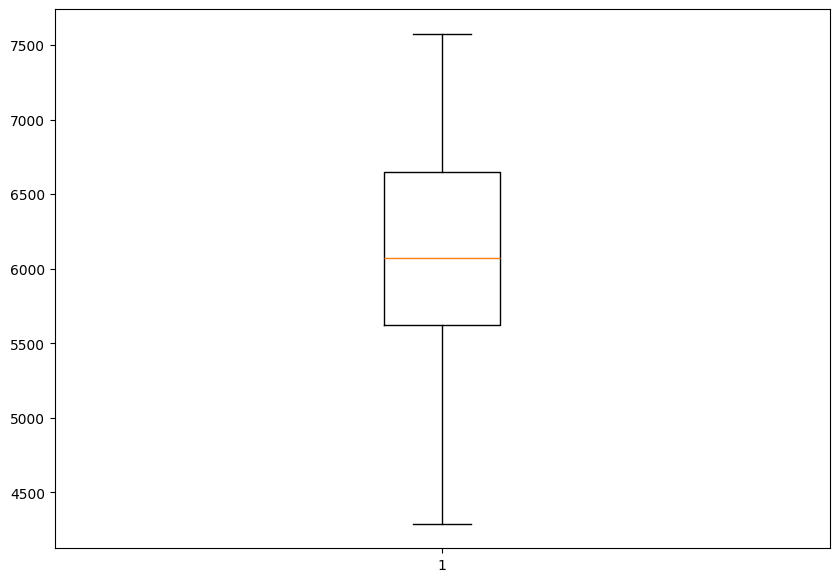

<Axes: >

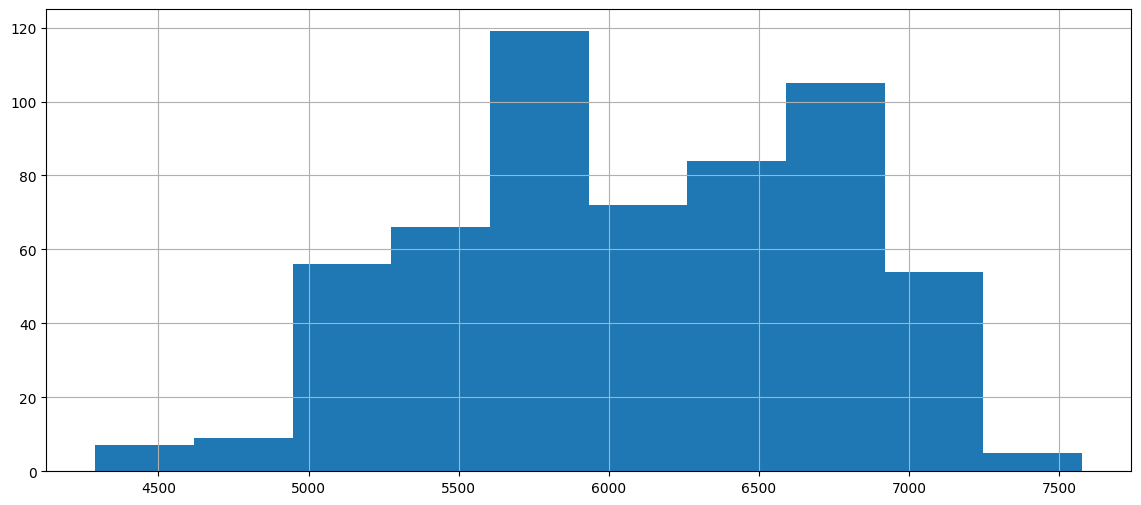

In [59]:

fig = go.Figure(data=[go.Candlestick(x=df_asii['prev'].index,
                open=df_asii['open'],
                high=df_asii['high'],
                low=df_asii['low'],
                close=df_asii['close'])])

fig.show()

plt.plot(df_asii['close'], color='cornflowerblue', label='ASII')
plt.xlabel('Tanggal', fontsize=20)
plt.ylabel('Harga Penutupan dalam Rupiah (Rp)', fontsize=10)
plt.legend()
plt.title('Riwayat Harga Penutupan pada Emiten ASII')
import calplot
import matplotlib.pyplot as plt

calplot.calplot(df_asii['close'], yearascending = False,
                suptitle = 'Hari Kerja Bursa 2022 - Mei 2024', 
                suptitle_kws = {'x': 0.5, 'y': 1.0})
# plt.show()
fig = plt.figure(figsize =(10, 7)) 
# Creating plot
plt.boxplot(df_asii['close'])
# show plot
plt.show()
df_asii['close'].hist(bins=10, figsize=[14,6])

##### UNTR

In [39]:
df_untr.describe()

,prev,open,high,low,close,change
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,26615.077990,26654.809359,26971.403813,26324.956672,26614.948007,-0.129983
std,3468.801006,3470.715729,3533.638736,3399.454709,3468.970013,558.419793
min,20925.000000,21075.000000,21675.000000,20925.000000,20925.000000,-2175.000000
25%,23725.000000,23700.000000,24025.000000,23450.000000,23725.000000,-300.000000
50%,26075.000000,26150.000000,26400.000000,25800.000000,26075.000000,0.000000
75%,29000.000000,29050.000000,29450.000000,28700.000000,29000.000000,275.000000
max,35500.000000,35425.000000,36200.000000,34825.000000,35500.000000,2725.000000


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


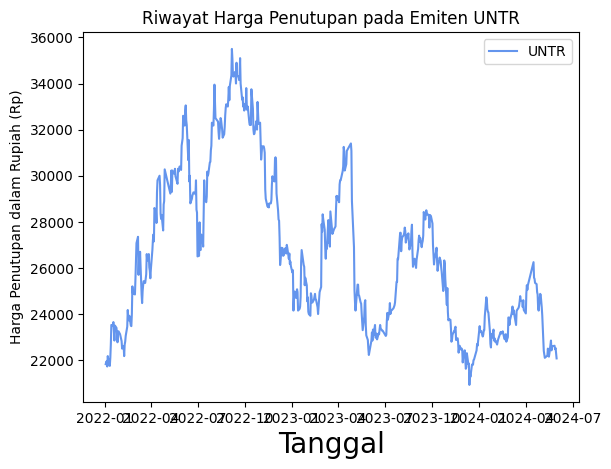

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


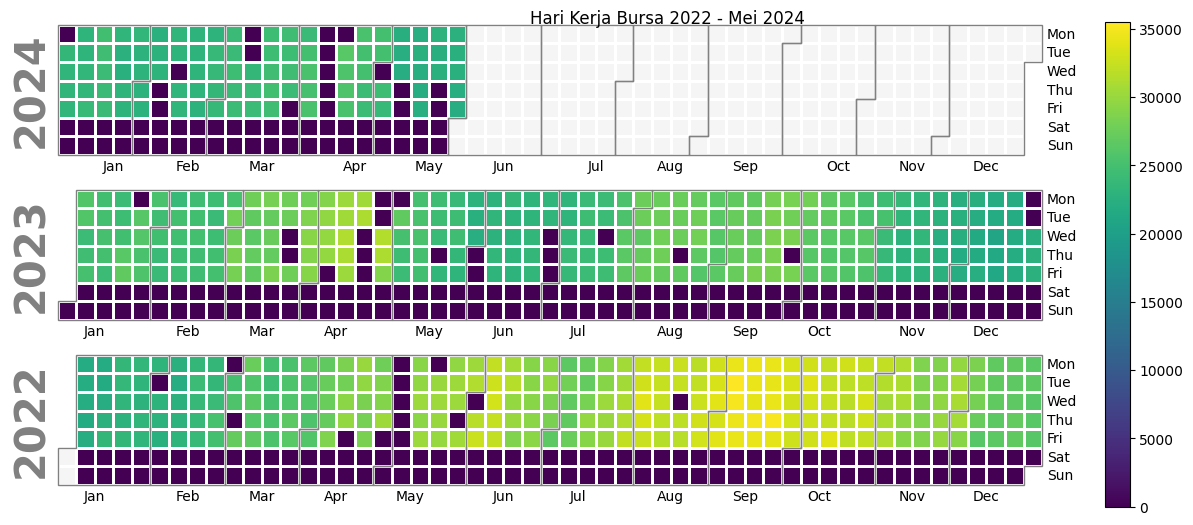

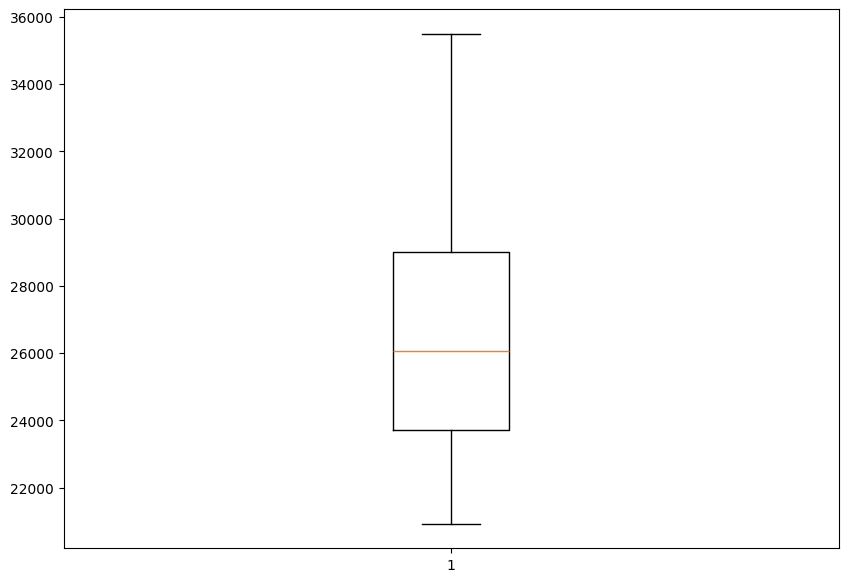

<Axes: >

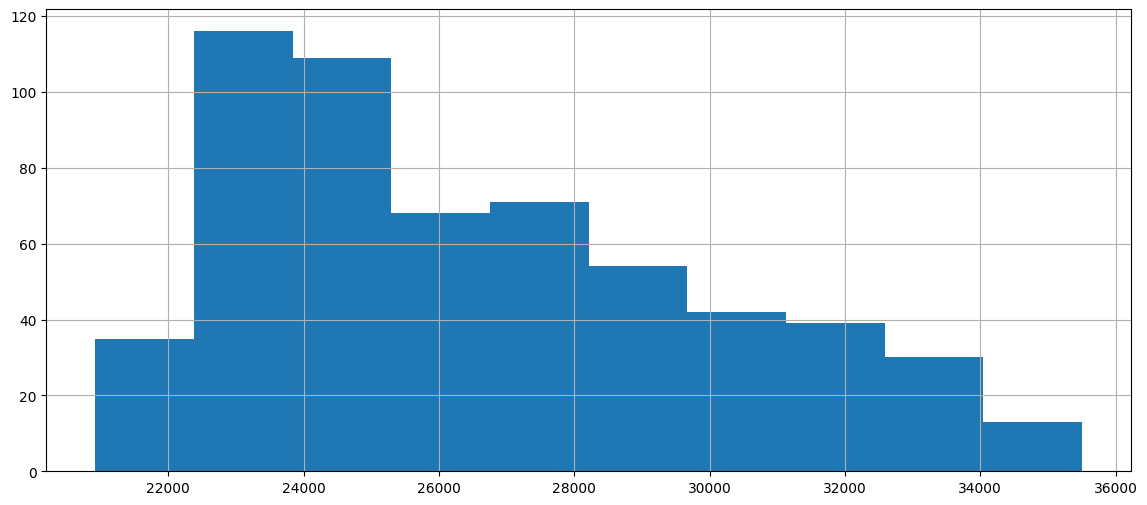

In [60]:

fig = go.Figure(data=[go.Candlestick(x=df_untr['prev'].index,
                open=df_untr['open'],
                high=df_untr['high'],
                low=df_untr['low'],
                close=df_untr['close'])])

fig.show()

plt.plot(df_untr['close'], color='cornflowerblue', label='UNTR')
plt.xlabel('Tanggal', fontsize=20)
plt.ylabel('Harga Penutupan dalam Rupiah (Rp)', fontsize=10)
plt.legend()
plt.title('Riwayat Harga Penutupan pada Emiten UNTR')
import calplot
import matplotlib.pyplot as plt

calplot.calplot(df_untr['close'], yearascending = False,
                suptitle = 'Hari Kerja Bursa 2022 - Mei 2024', 
                suptitle_kws = {'x': 0.5, 'y': 1.0})
# plt.show()
fig = plt.figure(figsize =(10, 7)) 
# Creating plot
plt.boxplot(df_untr['close'])
# show plot
plt.show()
df_untr['close'].hist(bins=10, figsize=[14,6])

##### UNVR

In [40]:
df_unvr.describe()

,prev,open,high,low,close,change
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,4041.724437,4043.188908,4088.500867,3989.800693,4040.008666,-1.715771
std,700.482732,697.897304,701.328759,690.723318,701.526887,84.878399
min,2330.000000,2350.000000,2420.000000,2330.000000,2330.000000,-370.000000
25%,3540.000000,3550.000000,3580.000000,3500.000000,3540.000000,-40.000000
50%,4160.000000,4160.000000,4220.000000,4110.000000,4160.000000,0.000000
75%,4650.000000,4640.000000,4700.000000,4600.000000,4650.000000,30.000000
max,5400.000000,5400.000000,5475.000000,5275.000000,5400.000000,500.000000


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


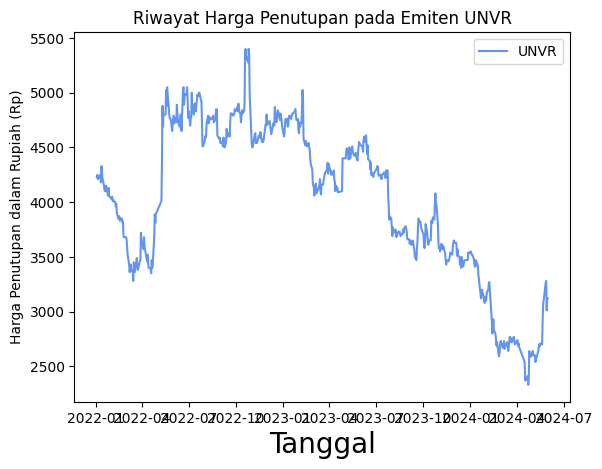

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


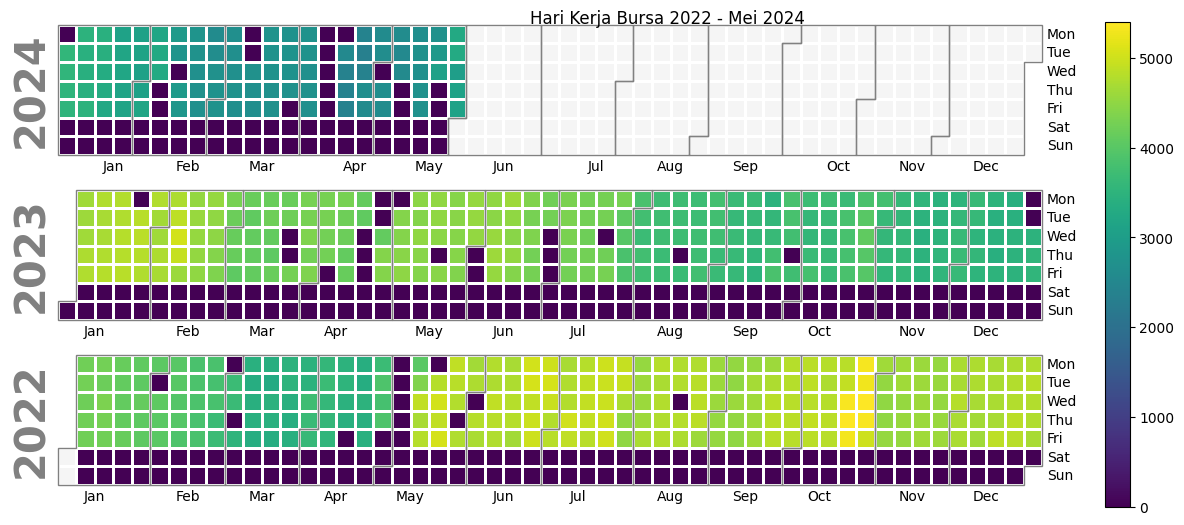

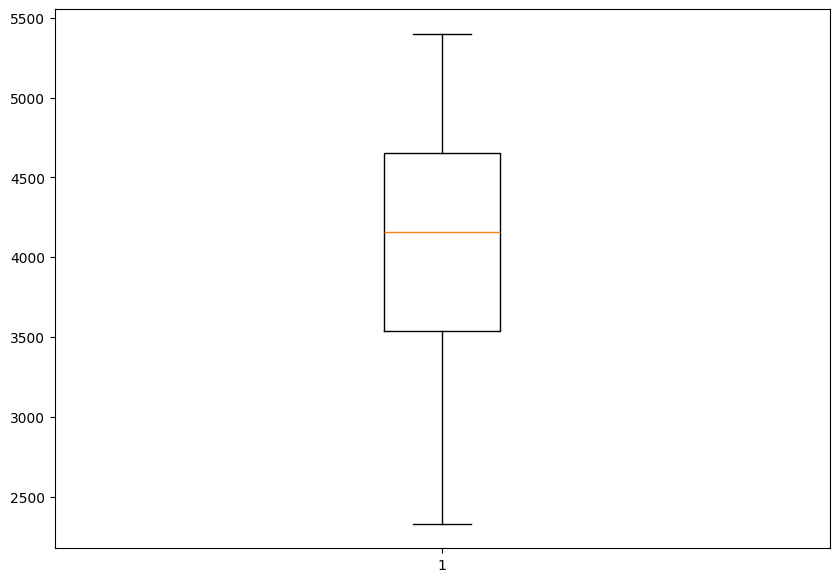

<Axes: >

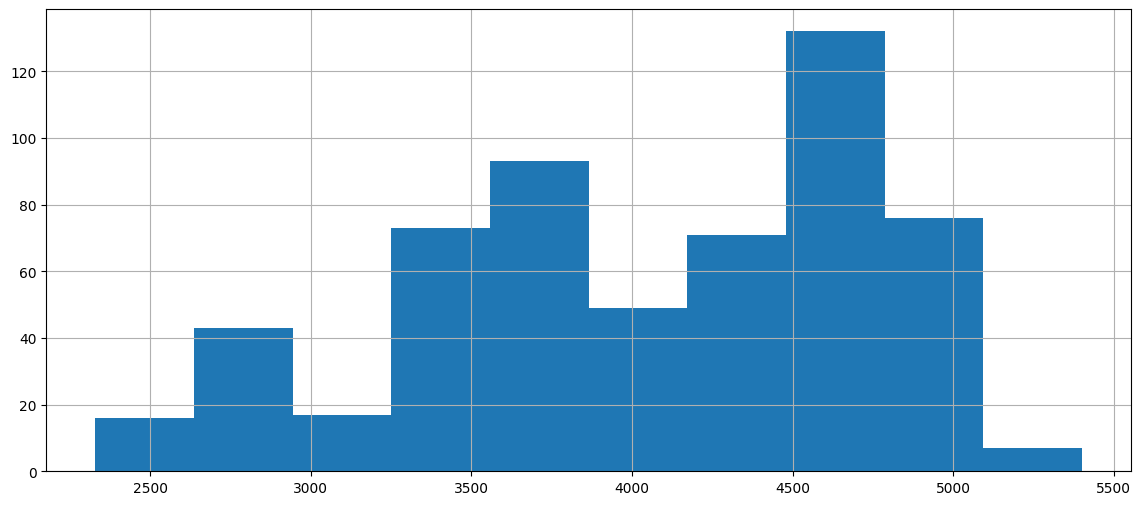

In [43]:
name = "unvr".upper()
fig = go.Figure(data=[go.Candlestick(x=df_unvr['prev'].index,
                open=df_unvr['open'],
                high=df_unvr['high'],
                low=df_unvr['low'],
                close=df_unvr['close'])])

fig.show()

plt.plot(df_unvr['close'], color='cornflowerblue', label=name)
plt.xlabel('Tanggal', fontsize=20)
plt.ylabel('Harga Penutupan dalam Rupiah (Rp)', fontsize=10)
plt.legend()
plt.title('Riwayat Harga Penutupan pada Emiten '+ name)
import calplot
import matplotlib.pyplot as plt

calplot.calplot(df_unvr['close'], yearascending = False,
                suptitle = 'Hari Kerja Bursa 2022 - Mei 2024', 
                suptitle_kws = {'x': 0.5, 'y': 1.0})
# plt.show()
fig = plt.figure(figsize =(10, 7)) 
# Creating plot
plt.boxplot(df_unvr['close'])
# show plot
plt.show()
df_unvr['close'].hist(bins=10, figsize=[14,6])

##### AMRT

In [44]:
df_amrt.describe()

,prev,open,high,low,close,change
count,577.000000,577.000000,577.00000,577.000000,577.000000,577.000000
mean,2440.285962,2403.327556,2481.17851,2401.403813,2442.772964,2.487002
std,576.631408,697.559126,577.55779,570.758987,574.427951,53.420439
min,1020.000000,0.000000,1075.00000,1020.000000,1020.000000,-200.000000
25%,1990.000000,1990.000000,2030.00000,1935.000000,1990.000000,-25.000000
50%,2730.000000,2740.000000,2760.00000,2680.000000,2730.000000,0.000000
75%,2870.000000,2870.000000,2900.00000,2820.000000,2870.000000,30.000000
max,3090.000000,3090.000000,3150.00000,3020.000000,3090.000000,250.000000


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


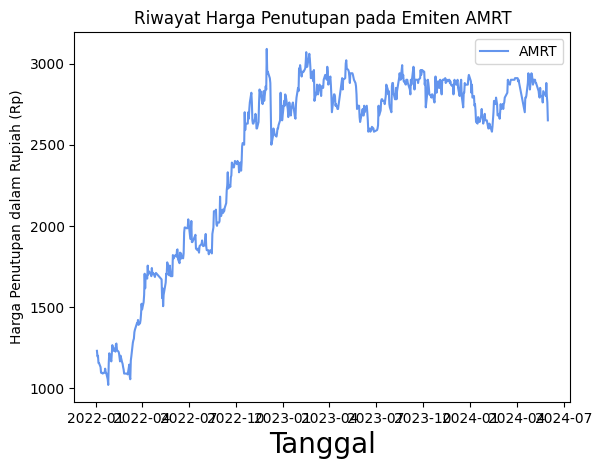

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


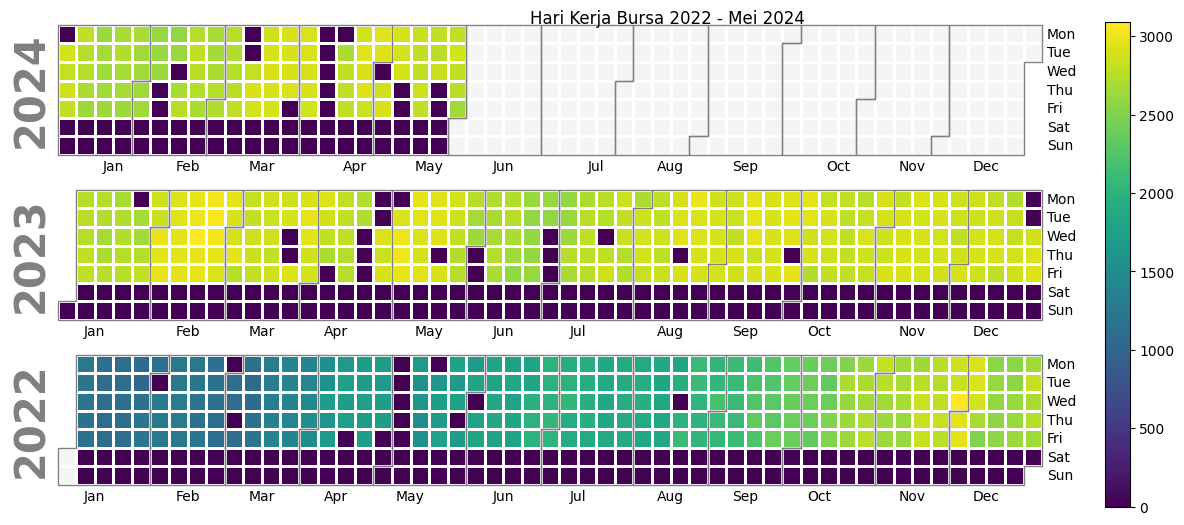

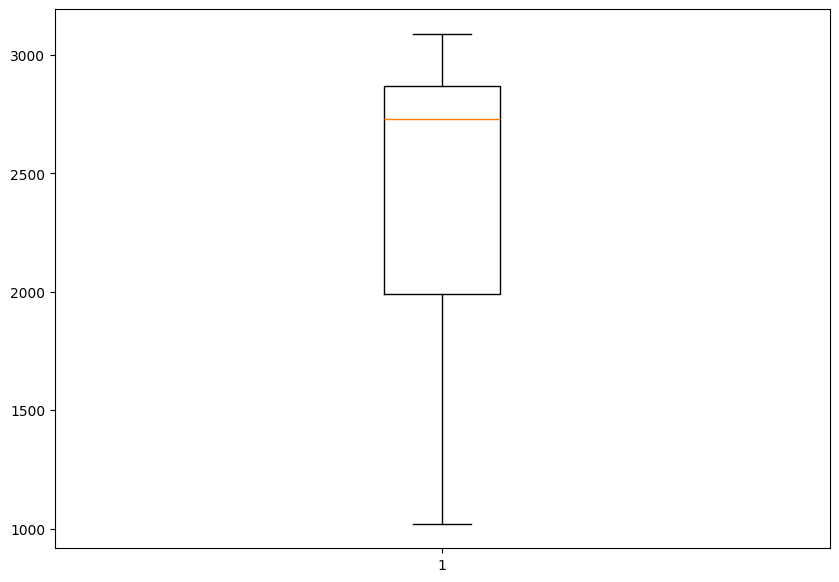

<Axes: >

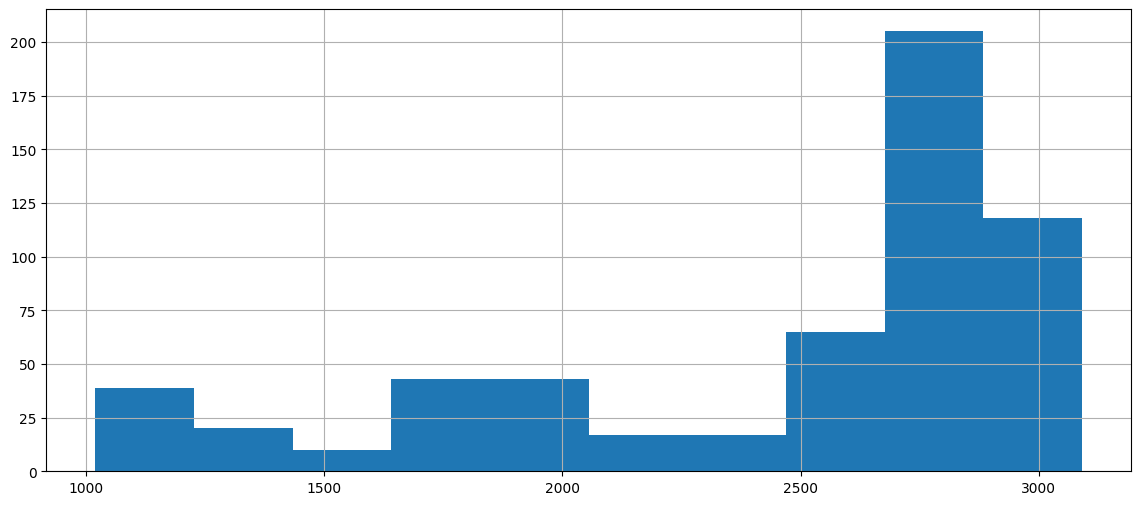

In [45]:
name = "amrt".upper()
fig = go.Figure(data=[go.Candlestick(x=df_amrt['prev'].index,
                open=df_amrt['open'],
                high=df_amrt['high'],
                low=df_amrt['low'],
                close=df_amrt['close'])])

fig.show()

plt.plot(df_amrt['close'], color='cornflowerblue', label=name)
plt.xlabel('Tanggal', fontsize=20)
plt.ylabel('Harga Penutupan dalam Rupiah (Rp)', fontsize=10)
plt.legend()
plt.title('Riwayat Harga Penutupan pada Emiten '+ name)
import calplot
import matplotlib.pyplot as plt

calplot.calplot(df_amrt['close'], yearascending = False,
                suptitle = 'Hari Kerja Bursa 2022 - Mei 2024', 
                suptitle_kws = {'x': 0.5, 'y': 1.0})
# plt.show()
fig = plt.figure(figsize =(10, 7)) 
# Creating plot
plt.boxplot(df_amrt['close'])
# show plot
plt.show()
df_amrt['close'].hist(bins=10, figsize=[14,6])

##### INTP

In [46]:
df_intp.describe()

,prev,open,high,low,close,change
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,9833.318891,9734.965338,9946.403813,9705.892548,9823.570191,-9.748700
std,914.052921,1350.171317,929.982044,895.441984,919.814147,184.075385
min,6475.000000,0.000000,6575.000000,6375.000000,6475.000000,-750.000000
25%,9275.000000,9300.000000,9375.000000,9200.000000,9275.000000,-100.000000
50%,9900.000000,9875.000000,9975.000000,9750.000000,9900.000000,0.000000
75%,10375.000000,10350.000000,10550.000000,10225.000000,10350.000000,75.000000
max,12100.000000,12000.000000,12050.000000,11650.000000,11700.000000,925.000000


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


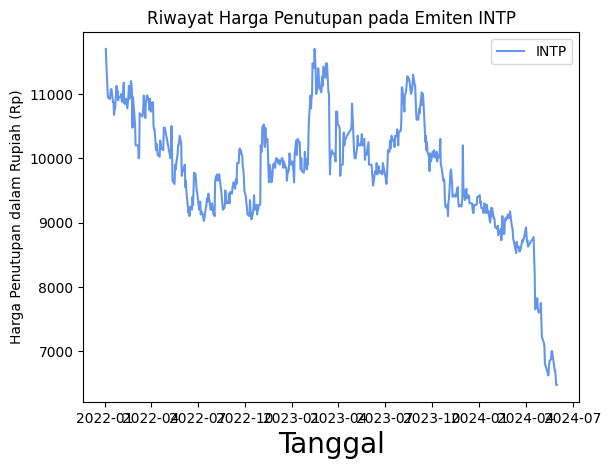

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


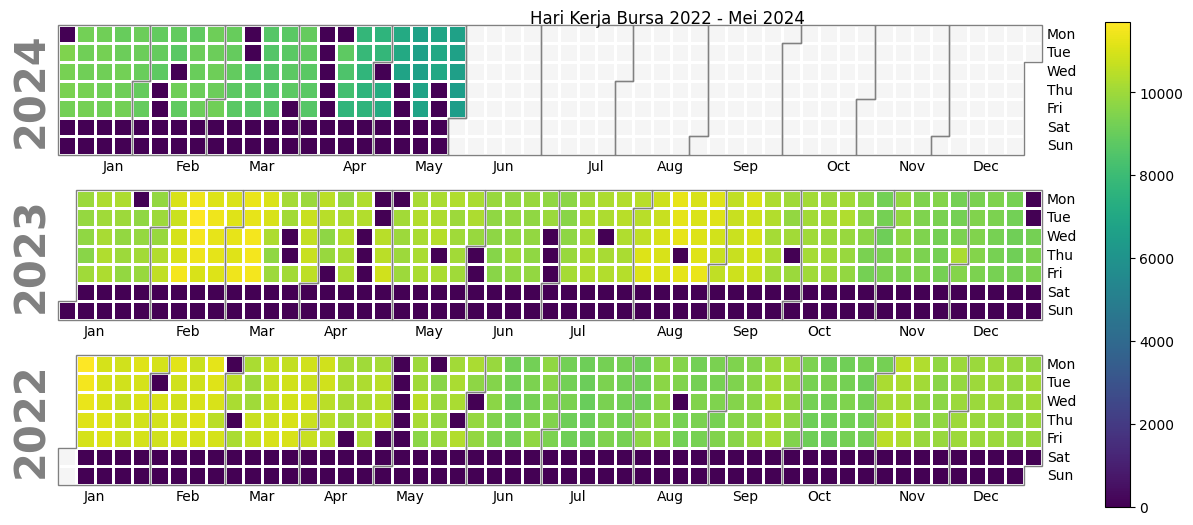

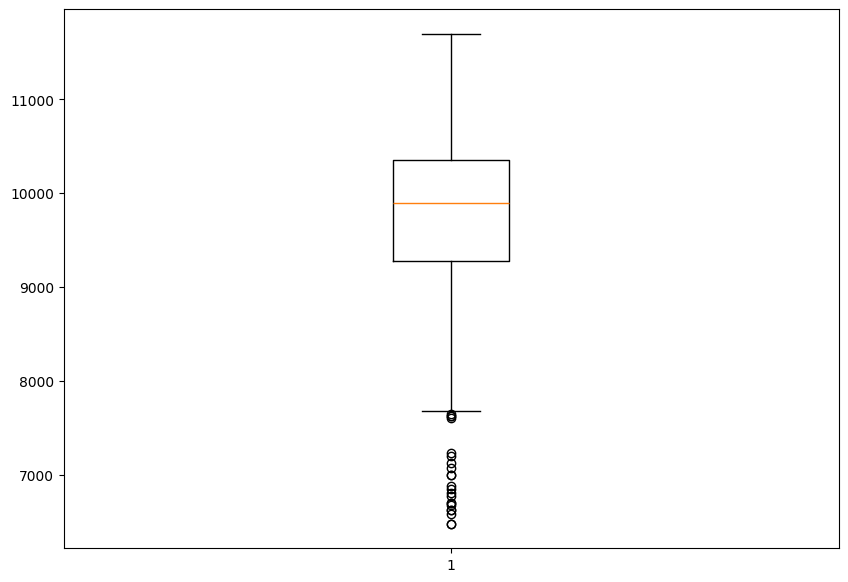

<Axes: >

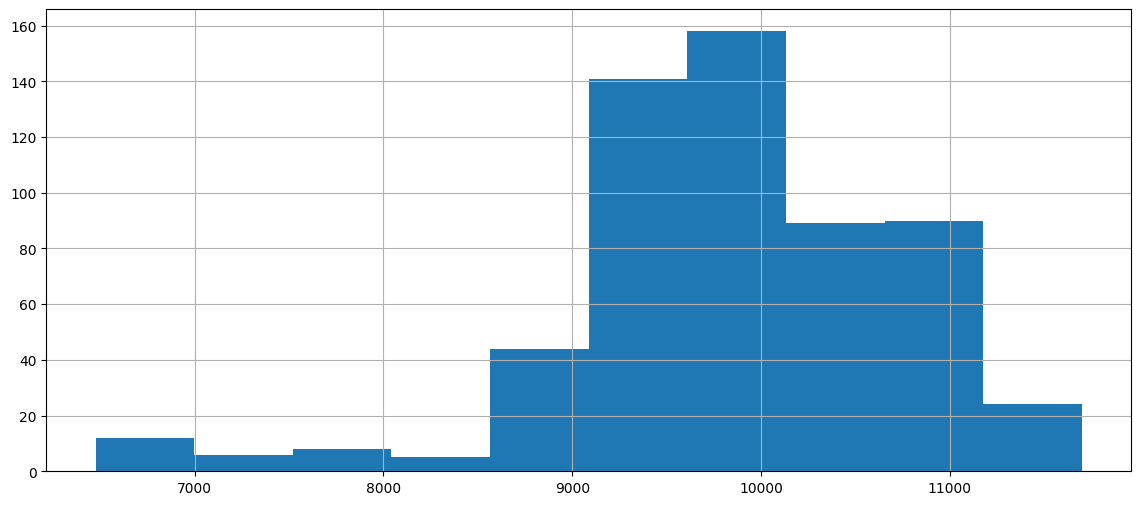

In [47]:
name = "intp".upper()
fig = go.Figure(data=[go.Candlestick(x=df_intp['prev'].index,
                open=df_intp['open'],
                high=df_intp['high'],
                low=df_intp['low'],
                close=df_intp['close'])])

fig.show()

plt.plot(df_intp['close'], color='cornflowerblue', label=name)
plt.xlabel('Tanggal', fontsize=20)
plt.ylabel('Harga Penutupan dalam Rupiah (Rp)', fontsize=10)
plt.legend()
plt.title('Riwayat Harga Penutupan pada Emiten '+ name)
import calplot
import matplotlib.pyplot as plt

calplot.calplot(df_intp['close'], yearascending = False,
                suptitle = 'Hari Kerja Bursa 2022 - Mei 2024', 
                suptitle_kws = {'x': 0.5, 'y': 1.0})
# plt.show()
fig = plt.figure(figsize =(10, 7)) 
# Creating plot
plt.boxplot(df_intp['close'])
# show plot
plt.show()
df_intp['close'].hist(bins=10, figsize=[14,6])

##### INKP

In [48]:
df_inkp.describe()

,prev,open,high,low,close,change
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,8535.051993,8527.686308,8676.733102,8406.802426,8537.261698,2.209705
std,932.418356,996.617183,959.560597,897.110452,932.243480,197.215018
min,6825.000000,0.000000,7025.000000,6775.000000,6825.000000,-1375.000000
25%,7800.000000,7800.000000,7925.000000,7675.000000,7800.000000,-100.000000
50%,8350.000000,8375.000000,8500.000000,8250.000000,8375.000000,0.000000
75%,9250.000000,9250.000000,9450.000000,9075.000000,9250.000000,100.000000
max,11550.000000,11550.000000,11850.000000,11375.000000,11550.000000,775.000000


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


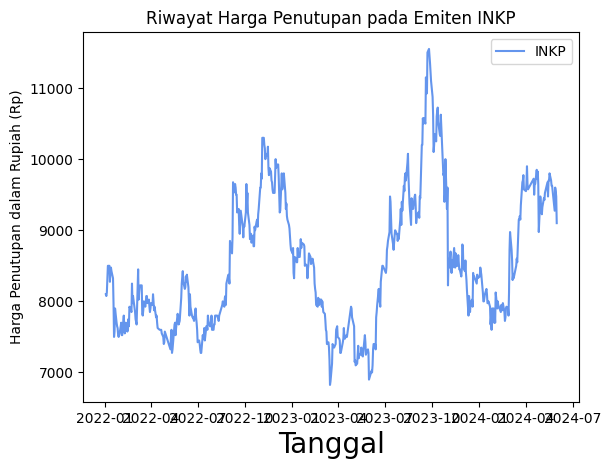

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


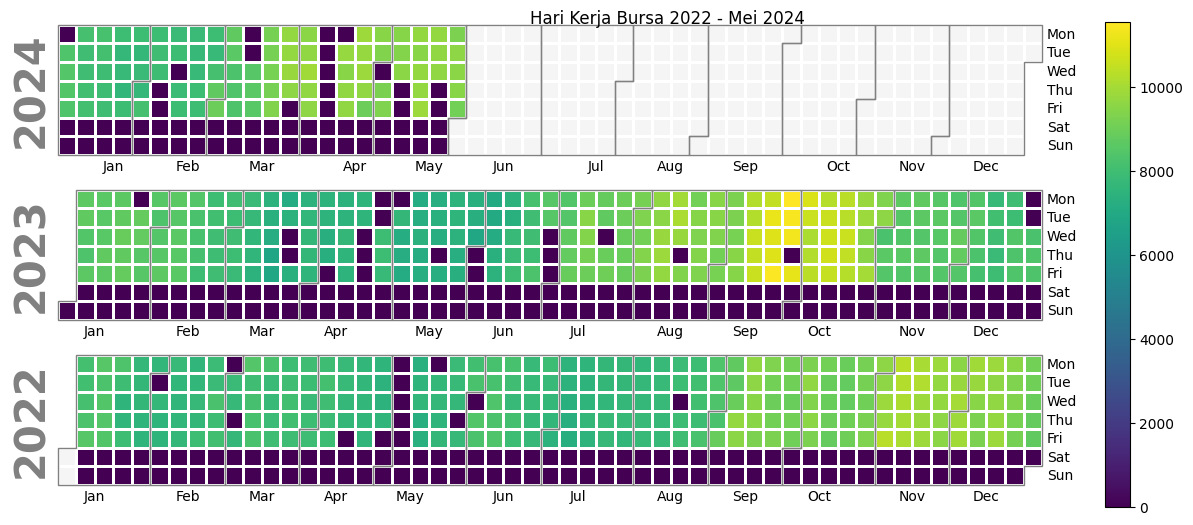

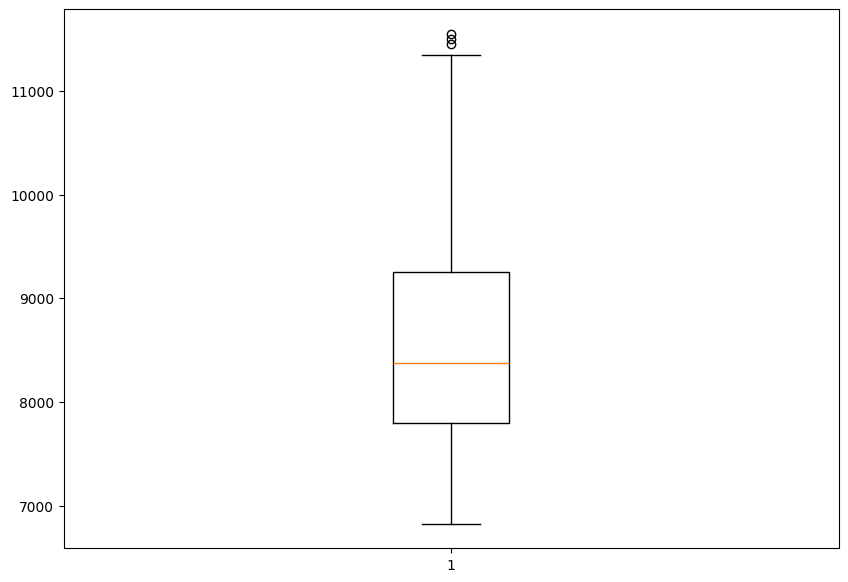

<Axes: >

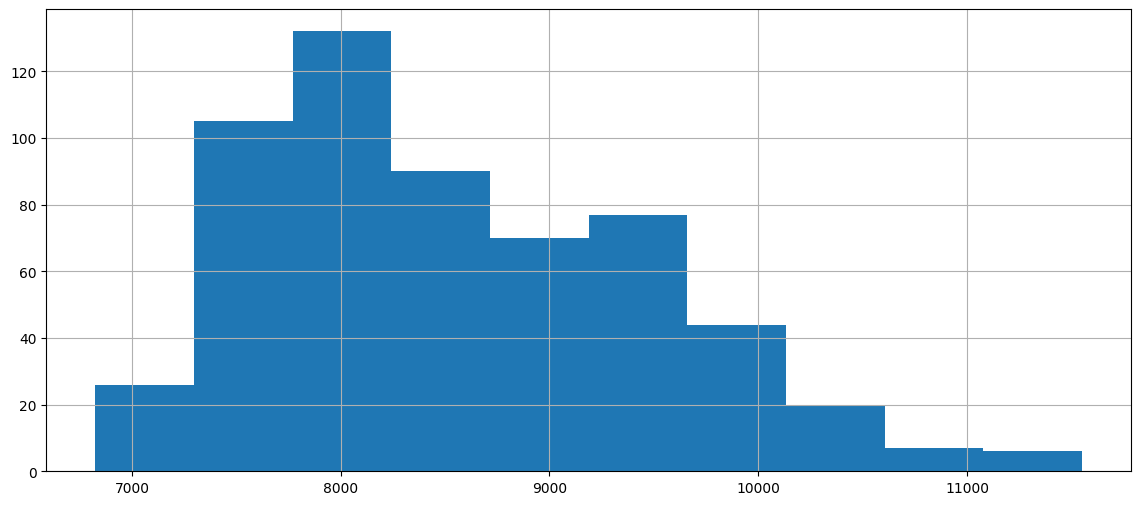

In [49]:
name = "inkp".upper()
fig = go.Figure(data=[go.Candlestick(x=df_inkp['prev'].index,
                open=df_inkp['open'],
                high=df_inkp['high'],
                low=df_inkp['low'],
                close=df_inkp['close'])])

fig.show()

plt.plot(df_inkp['close'], color='cornflowerblue', label=name)
plt.xlabel('Tanggal', fontsize=20)
plt.ylabel('Harga Penutupan dalam Rupiah (Rp)', fontsize=10)
plt.legend()
plt.title('Riwayat Harga Penutupan pada Emiten '+ name)
import calplot
import matplotlib.pyplot as plt

calplot.calplot(df_inkp['close'], yearascending = False,
                suptitle = 'Hari Kerja Bursa 2022 - Mei 2024', 
                suptitle_kws = {'x': 0.5, 'y': 1.0})
# plt.show()
fig = plt.figure(figsize =(10, 7)) 
# Creating plot
plt.boxplot(df_inkp['close'])
# show plot
plt.show()
df_inkp['close'].hist(bins=10, figsize=[14,6])

##### MAPI

In [50]:
df_mapi.describe()

,prev,open,high,low,close,change
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,1410.502600,618.804159,1442.123050,1382.798960,1411.473137,0.970537
std,411.604993,865.541562,416.505644,405.899752,410.609404,39.276365
min,700.000000,0.000000,730.000000,700.000000,700.000000,-135.000000
25%,980.000000,0.000000,1000.000000,960.000000,980.000000,-20.000000
50%,1440.000000,0.000000,1480.000000,1405.000000,1440.000000,0.000000
75%,1800.000000,1720.000000,1830.000000,1780.000000,1800.000000,25.000000
max,2030.000000,2030.000000,2070.000000,2000.000000,2030.000000,135.000000


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


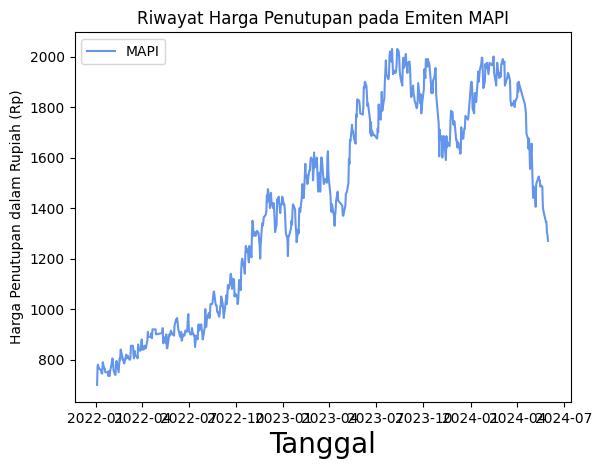

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


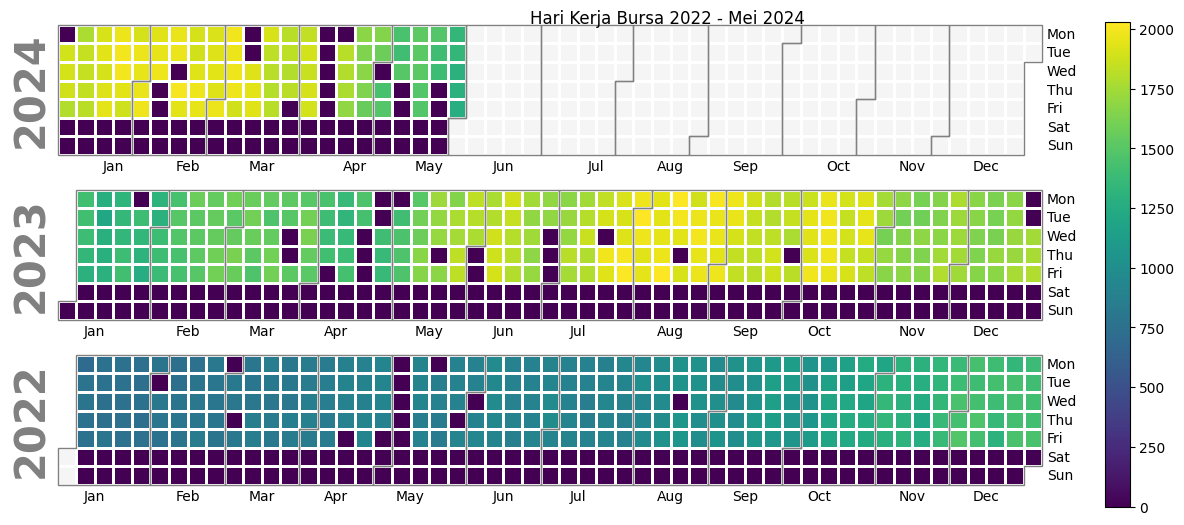

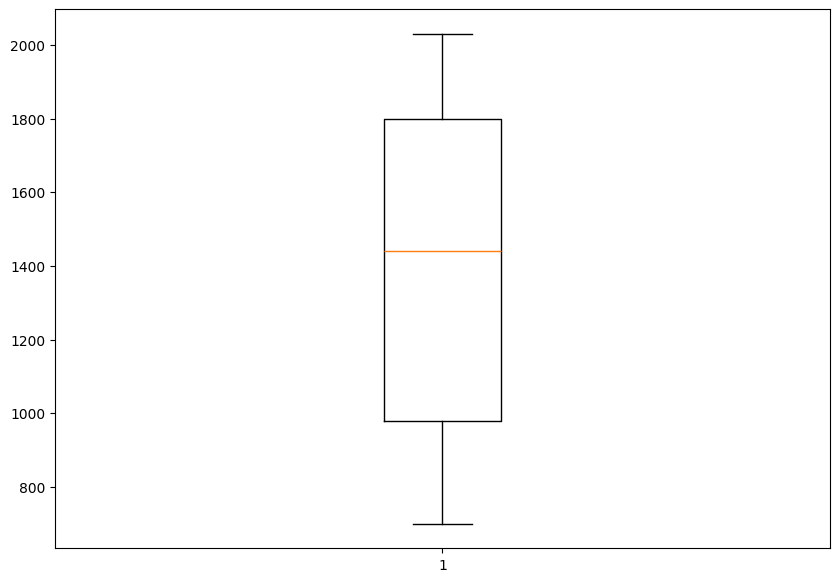

<Axes: >

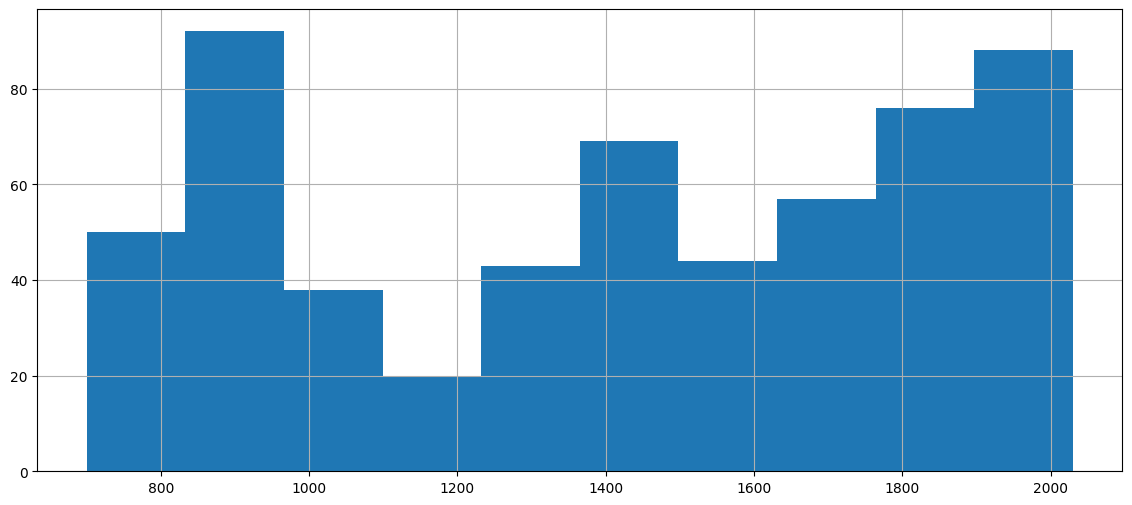

In [51]:
name = "mapi".upper()
fig = go.Figure(data=[go.Candlestick(x=df_mapi['prev'].index,
                open=df_mapi['open'],
                high=df_mapi['high'],
                low=df_mapi['low'],
                close=df_mapi['close'])])

fig.show()

plt.plot(df_mapi['close'], color='cornflowerblue', label=name)
plt.xlabel('Tanggal', fontsize=20)
plt.ylabel('Harga Penutupan dalam Rupiah (Rp)', fontsize=10)
plt.legend()
plt.title('Riwayat Harga Penutupan pada Emiten '+ name)
import calplot
import matplotlib.pyplot as plt

calplot.calplot(df_mapi['close'], yearascending = False,
                suptitle = 'Hari Kerja Bursa 2022 - Mei 2024', 
                suptitle_kws = {'x': 0.5, 'y': 1.0})
# plt.show()
fig = plt.figure(figsize =(10, 7)) 
# Creating plot
plt.boxplot(df_mapi['close'])
# show plot
plt.show()
df_mapi['close'].hist(bins=10, figsize=[14,6])

##### SIDO

In [52]:
df_sido.describe()


,prev,open,high,low,close,change
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,750.556326,356.604853,760.883882,740.982669,750.287695,-0.268631
std,150.352170,342.289990,152.047046,148.691537,150.285794,13.559243
min,486.000000,0.000000,494.000000,478.000000,486.000000,-65.000000
25%,630.000000,0.000000,645.000000,620.000000,630.000000,-5.000000
50%,740.000000,500.000000,750.000000,730.000000,740.000000,0.000000
75%,885.000000,650.000000,895.000000,865.000000,885.000000,5.000000
max,1050.000000,910.000000,1070.000000,1040.000000,1050.000000,55.000000


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


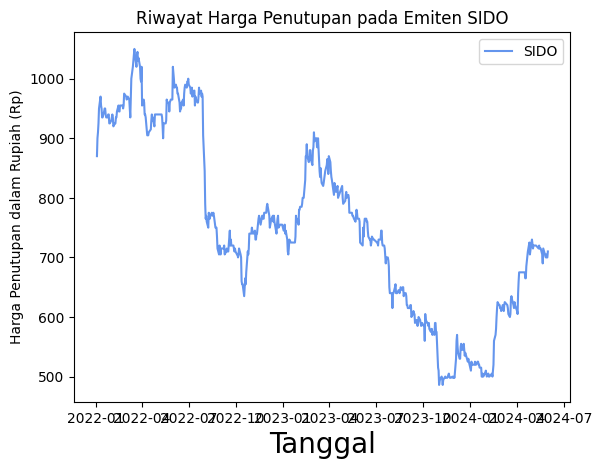

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


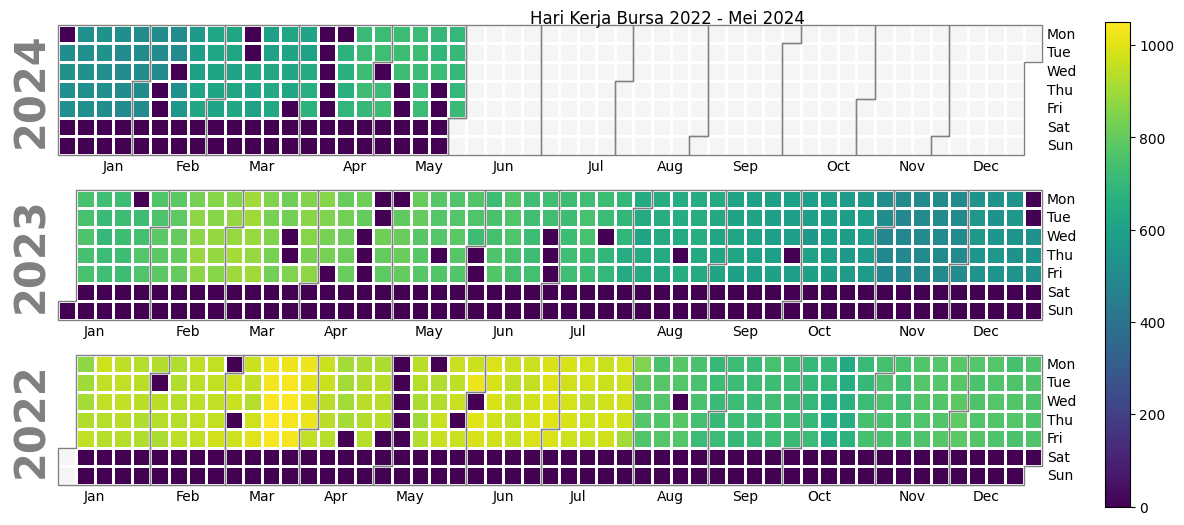

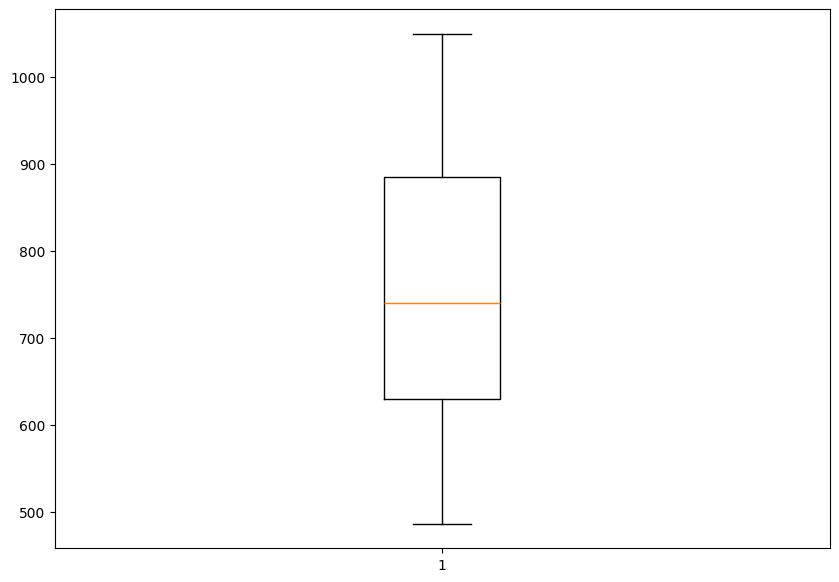

<Axes: >

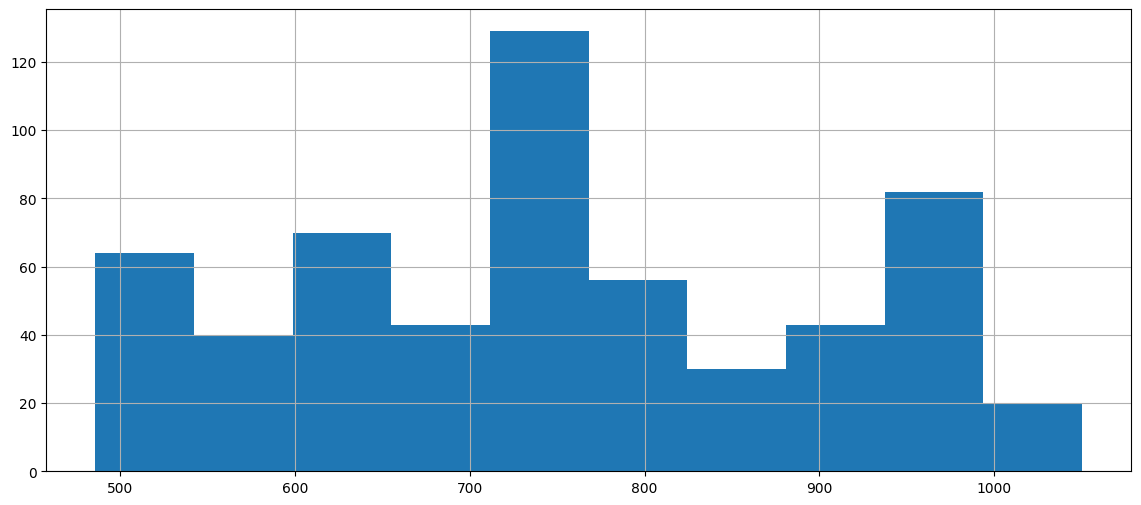

In [54]:
name = "sido".upper()
fig = go.Figure(data=[go.Candlestick(x=df_sido['prev'].index,
                open=df_sido['open'],
                high=df_sido['high'],
                low=df_sido['low'],
                close=df_sido['close'])])

fig.show()

plt.plot(df_sido['close'], color='cornflowerblue', label=name)
plt.xlabel('Tanggal', fontsize=20)
plt.ylabel('Harga Penutupan dalam Rupiah (Rp)', fontsize=10)
plt.legend()
plt.title('Riwayat Harga Penutupan pada Emiten '+ name)
import calplot
import matplotlib.pyplot as plt

calplot.calplot(df_sido['close'], yearascending = False,
                suptitle = 'Hari Kerja Bursa 2022 - Mei 2024', 
                suptitle_kws = {'x': 0.5, 'y': 1.0})
# plt.show()
fig = plt.figure(figsize =(10, 7)) 
# Creating plot
plt.boxplot(df_sido['close'])
# show plot
plt.show()
df_sido['close'].hist(bins=10, figsize=[14,6])

##### HRUM

In [55]:
df_hrum.describe()

,prev,open,high,low,close,change
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,3157.972270,2781.282496,3239.341421,3091.083189,3158.960139,0.987868
std,3625.007514,3381.906154,3743.275127,3535.096688,3631.492349,186.163696
min,1105.000000,0.000000,1135.000000,1075.000000,1105.000000,-950.000000
25%,1440.000000,1410.000000,1465.000000,1410.000000,1435.000000,-30.000000
50%,1625.000000,1615.000000,1655.000000,1605.000000,1625.000000,0.000000
75%,1790.000000,1760.000000,1825.000000,1755.000000,1785.000000,30.000000
max,14075.000000,14300.000000,14750.000000,13675.000000,14075.000000,1150.000000


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


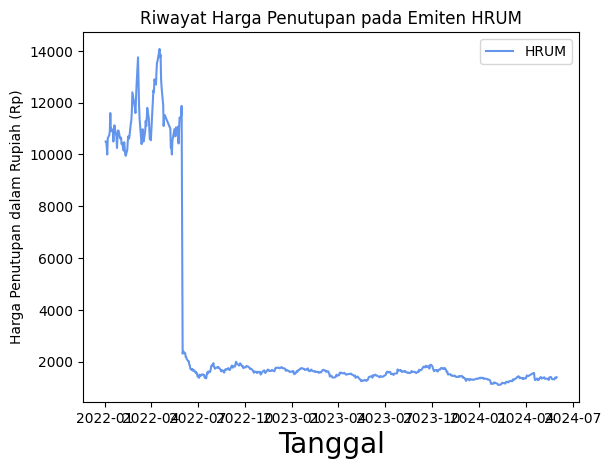

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


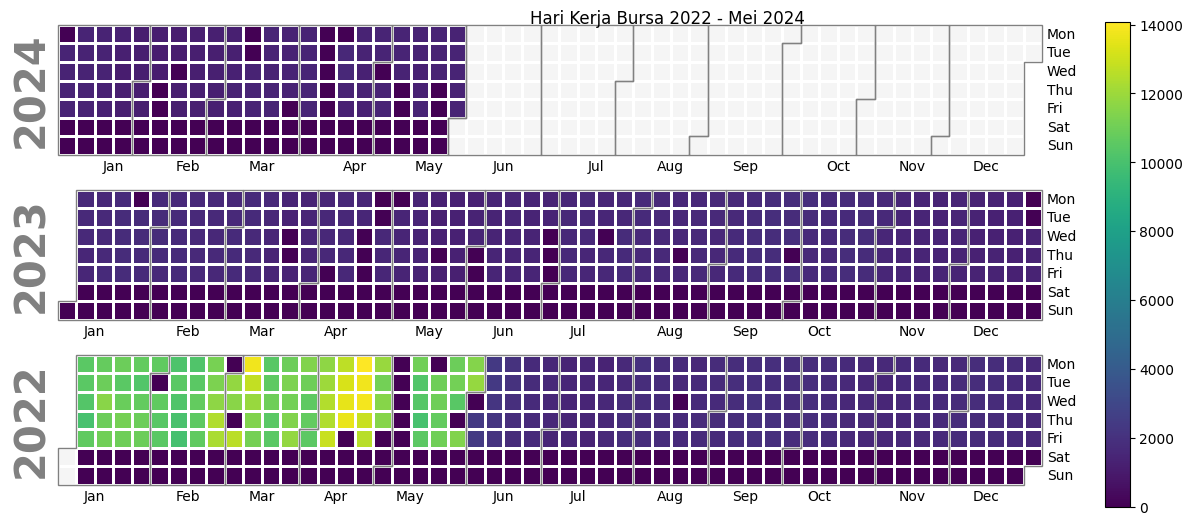

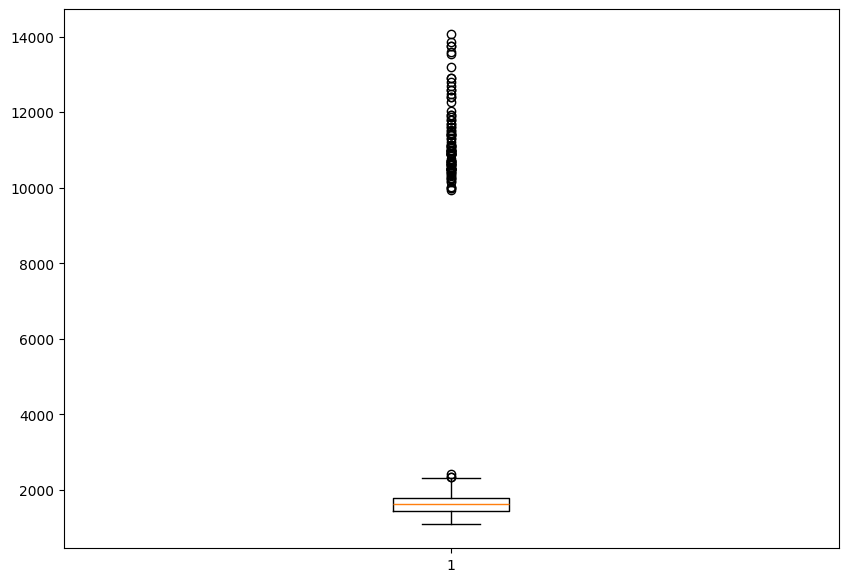

<Axes: >

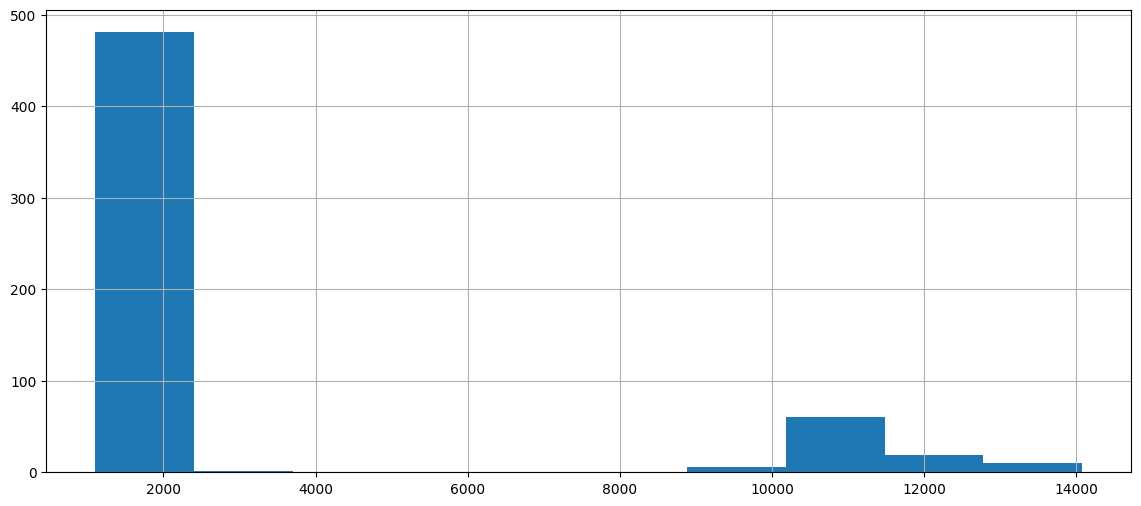

In [56]:
name = "hrum".upper()
fig = go.Figure(data=[go.Candlestick(x=df_hrum['prev'].index,
                open=df_hrum['open'],
                high=df_hrum['high'],
                low=df_hrum['low'],
                close=df_hrum['close'])])

fig.show()

plt.plot(df_hrum['close'], color='cornflowerblue', label=name)
plt.xlabel('Tanggal', fontsize=20)
plt.ylabel('Harga Penutupan dalam Rupiah (Rp)', fontsize=10)
plt.legend()
plt.title('Riwayat Harga Penutupan pada Emiten '+ name)
import calplot
import matplotlib.pyplot as plt

calplot.calplot(df_hrum['close'], yearascending = False,
                suptitle = 'Hari Kerja Bursa 2022 - Mei 2024', 
                suptitle_kws = {'x': 0.5, 'y': 1.0})
# plt.show()
fig = plt.figure(figsize =(10, 7)) 
# Creating plot
plt.boxplot(df_hrum['close'])
# show plot
plt.show()
df_hrum['close'].hist(bins=10, figsize=[14,6])